In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [2]:
df_movies = pd.read_csv('./datasets/MovieRecc/movies.csv')
df_ratings = pd.read_csv('./datasets/MovieRecc/ratings.csv')

In [3]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
df_movies.tail()

,movieId,title,genres
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [6]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
df_movies_final = df_movies.copy()


In [9]:
df_movies_final['Year'] = df_movies_final.title.str.extract(r'\((\d\d\d\d)\)')
df_movies_final.title = df_movies_final.title.str.replace(r'\((\d\d\d\d)\)', '')
df_movies_final.title = df_movies_final.title.apply(lambda x: x.strip())
df_movies_final.Year = pd.to_numeric(df_movies_final.Year)

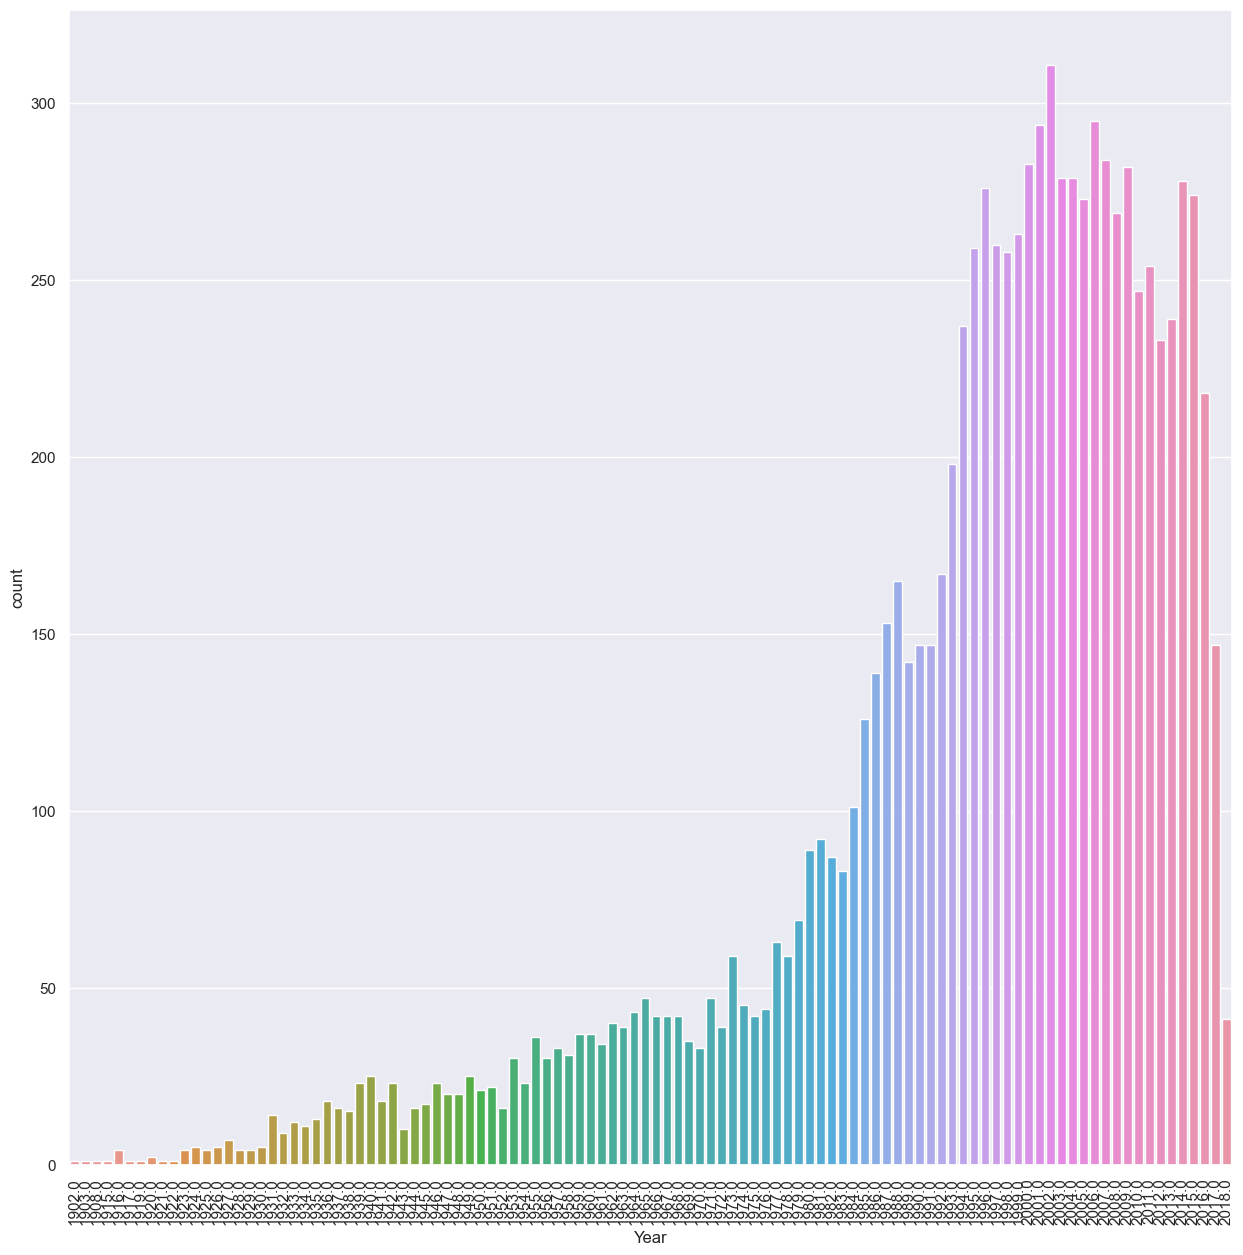

In [10]:
sns.set(rc={'figure.figsize':(15,15)})
plot = sns.countplot(x = 'Year', data = df_movies_final,)
plot.tick_params(axis='x', rotation=90)

In [11]:
# The number of movies exponentially increased with the year.

In [12]:
# Genre Extraction from series
genres_unique = set()
for i in df_movies_final.genres:
    genre_set = set(i.split('|'))
    genres_unique = genres_unique.union(genre_set)


    

In [13]:
genres_unique

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [14]:
df_merged = df_ratings.merge(df_movies_final)

In [15]:
df_merged

,userId,movieId,rating,timestamp,title,genres,Year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,1997.0
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,1971.0
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,2005.0
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,2016.0


In [16]:
df_movies_final

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II (1995),Comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017.0
9739,193585,Flint (2017),Drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018.0


In [17]:
import re


In [18]:
def clean_genre(x):
    x = re.sub('[^0-9A-Za-z]',' ', x)
    x = x.lower()
    x = x.split()
    wl = nltk.WordNetLemmatizer()
    x = [wl.lemmatize(word) for word in x if not word in set(nltk.corpus.stopwords.words('english'))]
    x = ' '.join(x)
    return x
    

In [19]:
df_movies_final['genres'] = df_movies_final['genres'].apply(clean_genre)

In [20]:
df_movies_final

,movieId,title,genres,Year
0,1,Toy Story (1995),adventure animation child comedy fantasy,1995.0
1,2,Jumanji (1995),adventure child fantasy,1995.0
2,3,Grumpier Old Men (1995),comedy romance,1995.0
3,4,Waiting to Exhale (1995),comedy drama romance,1995.0
4,5,Father of the Bride Part II (1995),comedy,1995.0
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),action animation comedy fantasy,2017.0
9738,193583,No Game No Life: Zero (2017),animation comedy fantasy,2017.0
9739,193585,Flint (2017),drama,2017.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),action animation,2018.0


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(df_movies_final.genres).A

In [23]:
vector

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
vocab = vectorizer.vocabulary_
vocab = dict((v, k) for k,v in vocab.items())
vocab

{1: 'adventure',
 2: 'animation',
 3: 'child',
 4: 'comedy',
 8: 'fantasy',
 18: 'romance',
 7: 'drama',
 0: 'action',
 5: 'crime',
 20: 'thriller',
 12: 'horror',
 16: 'mystery',
 19: 'sci',
 9: 'fi',
 21: 'war',
 15: 'musical',
 6: 'documentary',
 13: 'imax',
 22: 'western',
 10: 'film',
 17: 'noir',
 11: 'genre',
 14: 'listed'}

In [25]:
df_movies_final = pd.concat([df_movies_final.drop('genres', axis = 1), pd.DataFrame(vector )], axis = 1)

In [26]:
df_movies_final

,movieId,title,Year,0,1,2,3,4,5,6,...,13,14,15,16,17,18,19,20,21,22
0,1,Toy Story (1995),1995.0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),2017.0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),2017.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),2017.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),2018.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_movies_final = df_movies_final.rename(columns = vocab)

In [28]:
df_movies_final

,movieId,title,Year,action,adventure,animation,child,comedy,crime,documentary,...,imax,listed,musical,mystery,noir,romance,sci,thriller,war,western
0,1,Toy Story (1995),1995.0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),1995.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),1995.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995.0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),2017.0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),2017.0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),2017.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),2018.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_final = df_movies_final.merge(df_ratings)

In [30]:
df_final_drop = df_final.drop(['movieId', 'title', 'timestamp','rating','Year'], axis = 1)

In [31]:
df_final_drop

,action,adventure,animation,child,comedy,crime,documentary,drama,fantasy,fi,...,listed,musical,mystery,noir,romance,sci,thriller,war,western,userId
0,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5
2,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7
3,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15
4,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,184
100832,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,184
100833,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,184
100834,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,184


In [32]:
df_grp = df_final_drop.groupby(by = 'userId').sum()

In [33]:
df_grp

,action,adventure,animation,child,comedy,crime,documentary,drama,fantasy,fi,...,imax,listed,musical,mystery,noir,romance,sci,thriller,war,western
userId,,,,,,,,,,,,,,,,,,,,,
1,90,85,29,42,83,45,0,68,47,40,...,0,0,22,18,1,26,40,55,22,7
2,11,3,0,0,7,10,3,17,0,4,...,4,0,0,2,0,1,4,10,1,1
3,14,11,4,5,9,2,0,16,4,15,...,0,0,1,1,0,5,15,7,5,0
4,25,29,6,10,104,27,2,120,19,12,...,1,0,16,23,4,58,12,38,7,10
5,9,8,6,9,15,12,0,25,7,2,...,3,0,5,1,0,11,2,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,151,147,42,49,421,133,5,698,97,79,...,16,0,44,91,8,355,79,199,65,17
607,72,45,6,19,55,27,0,82,21,36,...,1,0,5,17,0,29,36,61,6,2
608,277,181,55,88,355,146,6,280,111,167,...,12,0,33,69,4,106,167,259,19,11


In [34]:
from sklearn.neighbors import NearestNeighbors

In [35]:
model = NearestNeighbors()
model.fit(df_grp.values)

NearestNeighbors()

In [40]:
li = model.kneighbors([df_grp.values[1]],n_neighbors=5,return_distance=False)

In [41]:
current_user = df_final.loc[df_final["userId"]==li[0][0],:]["title"].values
similar_user = df_final.loc[df_final["userId"]==li[0][1],:]["title"].values

In [42]:
len(set(current_user).union(set(similar_user)))

457

In [43]:
from sklearn.metrics.pairwise import cosine_similarity


In [44]:
similarities = cosine_similarity(vector)

In [45]:
similarities

array([[1.        , 0.77459667, 0.31622777, ..., 0.        , 0.31622777,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.70710678],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        1.        ]])

In [46]:
uid = 18 #Checking for user 18
time = df_ratings.loc[df_ratings["userId"]==uid,["movieId","timestamp"]]
latest_movieId_watched_by_user = time.sort_values(by="timestamp",ascending=False)["movieId"].values[0]
latest_movieId_watched_by_user

166015

In [47]:
movie_index = df_movies.loc[df_movies['movieId']==latest_movieId_watched_by_user,["title"]].index[0]
df_movies_final.loc[df_movies_final['movieId']==166015,:]

,movieId,title,Year,action,adventure,animation,child,comedy,crime,documentary,...,imax,listed,musical,mystery,noir,romance,sci,thriller,war,western
9425,166015,The African Doctor (2016),2016.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
movie_index

9425

In [49]:
movie_index = df_movies.loc[df_movies['movieId']==latest_movieId_watched_by_user,["title"]].index[0]
similarity_values = pd.Series(similarities[movie_index])

In [50]:
similar_movie_indexes = list(similarity_values.sort_values(ascending=False).index)
similar_movie_indexes

[2410,
 414,
 5486,
 436,
 5436,
 8441,
 1327,
 5426,
 8452,
 1337,
 1339,
 1342,
 8468,
 1350,
 8485,
 5361,
 8494,
 5520,
 5356,
 410,
 5329,
 1368,
 8507,
 8521,
 5275,
 1386,
 1388,
 8571,
 5245,
 1396,
 5233,
 391,
 8407,
 1300,
 268,
 5764,
 5925,
 496,
 5920,
 494,
 493,
 492,
 489,
 5905,
 1197,
 5830,
 8293,
 5784,
 1232,
 1233,
 8309,
 5584,
 5760,
 8317,
 1239,
 5752,
 5742,
 462,
 8352,
 1262,
 8372,
 5630,
 1280,
 451,
 1281,
 5594,
 8579,
 5231,
 5181,
 8857,
 4565,
 8787,
 1613,
 8801,
 1621,
 310,
 1627,
 4515,
 8833,
 303,
 4494,
 4482,
 8847,
 8852,
 4452,
 5165,
 8861,
 8866,
 4444,
 4440,
 1664,
 1673,
 282,
 281,
 4378,
 4359,
 8907,
 4340,
 4328,
 1697,
 4599,
 329,
 4609,
 4618,
 5150,
 5139,
 8624,
 1435,
 5135,
 374,
 5123,
 1445,
 5095,
 8634,
 5085,
 4978,
 4950,
 4933,
 4930,
 4889,
 4882,
 4881,
 8708,
 4869,
 4838,
 4763,
 8744,
 4760,
 4718,
 8748,
 4703,
 4682,
 4671,
 5939,
 5955,
 5959,
 6661,
 7656,
 6993,
 6977,
 6976,
 6943,
 873,
 6935,
 879,
 887,

In [51]:
similar_movie_indexes.remove(movie_index)

In [52]:
for index in range(10):
    display(df_movies[df_movies['movieId'] == similar_movie_indexes[index]]['title'])

1810    Rocky III (1982)
Name: title, dtype: object

358    Air Up There, The (1994)
Name: title, dtype: object

3906    Who Is Cletis Tout? (2001)
Name: title, dtype: object

380    Color of Night (1994)
Name: title, dtype: object

Series([], Name: title, dtype: object)

Series([], Name: title, dtype: object)

1016    Amityville Horror, The (1979)
Name: title, dtype: object

Series([], Name: title, dtype: object)

Series([], Name: title, dtype: object)

1026    Body Snatcher, The (1945)
Name: title, dtype: object